<a href="https://colab.research.google.com/github/tombraganca/Inteligente-Artificial/blob/main/Terceiro%20Trabalho%20Pr%C3%A1tico%20sobre%20Redes%20Neurais%20-%20Deep%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instala a biblioteca
!pip install numpy
!pip install matplotlib
!pip install tensorflow
!pip install scikeras

import tensorflow as tf
print(tf.__version__)

import keras
import pandas as pd
import numpy as np

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')
from scikeras.wrappers import KerasClassifier, KerasRegressor

In [ ]:
# Carrega conjunto de dados
dados = pd.read_csv('/content/Rolamento_Treinamento.txt')

# Ver dados
dados.head()

In [ ]:


# Divide em Entrada e Resposta
X = dados.iloc[:,0:9] #Entrada
scaler = StandardScaler()
X = scaler.fit_transform(X)

Y1 = dados.iloc[:,9] #Resposta

# Transforma os dados
Y2 = []
for i in range(len(Y1)):
    linha = []
    for j in range(5):
      if (j+1) == Y1[i]:
        linha += [1]
      else:
        linha += [0]
    Y2.append(linha)

Y = pd.DataFrame(data=Y2,columns=['Tipo1', 'Tipo2', 'Tipo3', 'Tipo4', 'Tipo5'])

# Ver Y
Y.head()

In [ ]:

# create model
model = Sequential()
model.add(Dense(9, input_dim=9, activation='relu'))
model.add(Dense(5, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])


In [ ]:
# Compila o modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treina o Modelo
resultado = model.fit(X, Y, batch_size = 200, epochs = 2000)

Epoch 1/2000
2/2 [==============================] - 1s 13ms/step - loss: 0.7059 - accuracy: 0.2400
Epoch 2/2000
2/2 [==============================] - 0s 11ms/step - loss: 0.7018 - accuracy: 0.2425
Epoch 3/2000
2/2 [==============================] - 0s 12ms/step - loss: 0.6977 - accuracy: 0.2475
Epoch 4/2000
2/2 [==============================] - 0s 15ms/step - loss: 0.6938 - accuracy: 0.2500
Epoch 5/2000
2/2 [==============================] - 0s 9ms/step - loss: 0.6899 - accuracy: 0.2500
Epoch 6/2000
2/2 [==============================] - 0s 18ms/step - loss: 0.6860 - accuracy: 0.2525
Epoch 7/2000
2/2 [==============================] - 0s 10ms/step - loss: 0.6822 - accuracy: 0.2525
Epoch 8/2000
2/2 [==============================] - 0s 12ms/step - loss: 0.6785 - accuracy: 0.2575
Epoch 9/2000
2/2 [==============================] - 0s 14ms/step - loss: 0.6747 - accuracy: 0.2575
Epoch 10/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.6711 - accuracy: 0.2600
Epoch 11/2

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 14)                112       
                                                                 
 dense_7 (Dense)             (None, 7)                 105       
                                                                 
 dense_8 (Dense)             (None, 3)                 24        
                                                                 
Total params: 241 (964.00 Byte)
Trainable params: 241 (964.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


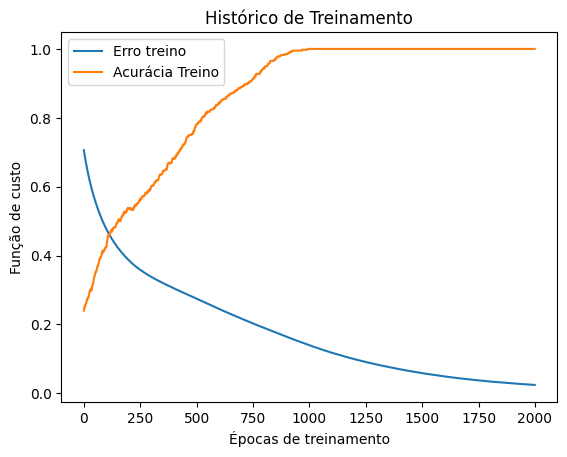

In [ ]:
# Mostra a rede
model.summary()

# Mostra Resultado
import matplotlib.pyplot as plt
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['accuracy'])
plt.title('Histórico de Treinamento')
plt.ylabel('Função de custo')
plt.xlabel('Épocas de treinamento')
plt.legend(['Erro treino', 'Acurácia Treino'])
plt.show()

In [ ]:
testes = pd.read_csv('/content/Rolamento_Teste.txt')

# Ver testes
testes.head()

,Diâmetro do furo (mm),Diâmetro Externo (mm),Largura B (mm),Carga Dinâmica (kN),Carga Estática (kN),Velocidade de Referência (r/min),Velocidade Limite (r/min),Vedação (m),Anel Externo (Unid)
0,16.9380,581.346,7797.45,0.897,0.2970,82749,29031,0.200444,2
1,18.0830,301.272,9500.78,0.074,0.5473,94154,95180,0.400566,1
2,45.2607,496.625,1300.09,0.436,0.5219,83996,6532,0.600666,2
3,90.9008,131.941,5343.58,0.568,0.0034,83362,79481,0.800469,9
4,45.4641,449.298,7994.23,0.141,0.8527,28049,65753,1.000814,0


In [ ]:
# Divide em Entrada
Xtestes = testes.iloc[:,0:9] #Entrada

Xtestes = scaler.fit_transform(Xtestes)


In [ ]:
# Testa a rede
Y_predito = model.predict(Xtestes)
Y_predito1 = np.array([])
print("Valores Preditos:",Y_predito)
for i in Y_predito:
    Y_parte = ([1 if max(i)==y else 0 for y in i])
    print(Y_parte)
    Y_predito1 = np.concatenate((Y_predito1,Y_parte))

Y_predito1 = Y_predito1.reshape(Y_predito.shape[0], Y_predito.shape[1])
print("Valores Preditos:",Y_predito1)


Ytestes = pd.DataFrame(data=Y_predito1, dtype=np.int8, columns=['Tipo1', 'Tipo2', 'Tipo3', 'Tipo4', 'Tipo5'])

# Ver Y
Ytestes.head()

1/1 [==============================] - 0s 135ms/step
Valores Preditos: [[9.71055031e-01 1.22031160e-01 3.44189830e-05 4.29457549e-13
  2.05357302e-12]
 [7.69883022e-03 8.31453145e-01 3.55167724e-02 2.62368701e-07
  4.91967911e-10]
 [5.36240492e-08 2.67300028e-02 9.56547737e-01 7.79931024e-02
  4.39326527e-07]
 [1.15782606e-10 1.88043131e-07 1.33686634e-02 8.53974044e-01
  1.91070382e-02]
 [6.43655485e-12 1.36023159e-12 1.53369410e-06 4.65548821e-02
  9.95462894e-01]
 [9.91692066e-01 8.43570977e-02 3.41312189e-05 3.23875502e-13
  5.87347488e-12]
 [4.35021240e-03 8.33294094e-01 4.06813398e-02 2.44855556e-07
  3.01429964e-10]
 [4.15838173e-07 1.85402725e-02 9.67285633e-01 4.54941578e-02
  9.75348257e-07]
 [5.50159571e-11 3.72770188e-07 1.16001163e-02 8.64479423e-01
  2.05990672e-02]
 [8.18547161e-13 2.10463504e-12 1.53323924e-06 7.92881548e-02
  9.93638217e-01]
 [9.92080152e-01 6.54747933e-02 3.53243704e-05 2.54384025e-13
  3.30390836e-12]
 [1.21485488e-02 8.10435295e-01 5.54928407e-02 1.

,Tipo1,Tipo2,Tipo3,Tipo4,Tipo5
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,0,1


In [ ]:

# Mostra Pesos
for layerNum, layer in enumerate(modelo.layers):
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]

    for toNeuronNum, bias in enumerate(biases):
        print(f'{layerNum}B -> L{layerNum+1}N{toNeuronNum}: {bias}')

    for fromNeuronNum, wgt in enumerate(weights):
        for toNeuronNum, wgt2 in enumerate(wgt):
            print(f'L{layerNum}N{fromNeuronNum} \
                  -> L{layerNum+1}N{toNeuronNum} = {wgt2}')


0B -> L1N0: 0.0
0B -> L1N1: 0.0
0B -> L1N2: 0.0
0B -> L1N3: 0.0
0B -> L1N4: 0.0
0B -> L1N5: 0.0
0B -> L1N6: 0.0
0B -> L1N7: 0.0
0B -> L1N8: 0.0
0B -> L1N9: 0.0
0B -> L1N10: 0.0
0B -> L1N11: 0.0
0B -> L1N12: 0.0
0B -> L1N13: 0.0
L0N0                   -> L1N0 = -0.007957756519317627
L0N0                   -> L1N1 = -0.04514297842979431
L0N0                   -> L1N2 = -0.45224255323410034
L0N0                   -> L1N3 = 0.4633902311325073
L0N0                   -> L1N4 = -0.13924384117126465
L0N0                   -> L1N5 = -0.10312744975090027
L0N0                   -> L1N6 = -0.26125410199165344
L0N0                   -> L1N7 = 0.0799594521522522
L0N0                   -> L1N8 = -0.4627315104007721
L0N0                   -> L1N9 = 0.26254749298095703
L0N0                   -> L1N10 = -0.4653344750404358
L0N0                   -> L1N11 = 0.11940497159957886
L0N0                   -> L1N12 = -0.503496527671814
L0N0                   -> L1N13 = 0.20255160331726074
L0N1                  